In [1]:
# import the necessary packages
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = measure.compare_ssim(imageA, imageB, multichannel=True)
    # setup the figure
#     fig = plt.figure(title)
#     plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
#     # show first image
#     ax = fig.add_subplot(1, 2, 1)
#     plt.imshow(imageA, cmap = plt.cm.gray)
#     plt.axis("off")
#     # show the second image
#     ax = fig.add_subplot(1, 2, 2)
#     plt.imshow(imageB, cmap = plt.cm.gray)
#     plt.axis("off")
#     # show the images
#     plt.show()
    
    return m, s

In [3]:
original = cv2.imread("0001.png")
original_cvt = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
original_cvt = cv2.resize(original_cvt, (256, 256), interpolation=cv2.INTER_CUBIC)

morph = cv2.imread("0.png")
morph_cvt = cv2.cvtColor(morph,cv2.COLOR_BGR2RGB)

noise = cv2.imread("frame_1.png")
noise_cvt = cv2.cvtColor(noise,cv2.COLOR_BGR2RGB)

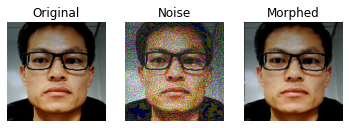

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


(737.9800109863281, 0.8555284785827052)

In [4]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original_cvt), ("Noise", noise_cvt), ("Morphed", morph_cvt)
#images = ("Original", original_cvt), ("Morphed", morph_cvt)
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original_cvt, original_cvt, "Original vs. Original")
compare_images(original_cvt, noise_cvt, "Original vs. Noise")
compare_images(original_cvt, morph_cvt, "Original vs. Morph")

## Test three directory (Multi-frame)

In [5]:
import os
dataset = 'OULU-NPU'
protocal = 'ijcb_protocal_2'
loss_type = 'CEP'
logit_type = 'normal'
eps = 0.6
filter_type = 1
filter_dimension = 3
filter_sigma = 1.2
filter_mode = 1
use_smooth_filter = 0
filter_time = 2
# original_dir = 'img_cmp/multi-frame/oulu/original'
# fgsm_dir = 'img_cmp/multi-frame/oulu/fgsm_0.2'
# morph_dir = 'img_cmp/multi-frame/oulu/morph_0.1'
if  dataset == 'OULU-NPU':
    original_dir = os.path.join('/mnt/sda1/maomao/FAS-SGTD/fas_sgtd_multi_frame', 'original_image', dataset, protocal)
    fgsm_dir = os.path.join('/mnt/sda1/maomao/FAS-SGTD/fas_sgtd_multi_frame', 'FGSM_result', dataset, protocal, f'logit_type_{logit_type}', f'loss_type_{loss_type}', f'eps_{eps}', 'attack_image')
else:
    original_dir = os.path.join('/mnt/sda1/maomao/FAS-SGTD/fas_sgtd_multi_frame', 'original_image', dataset)
    fgsm_dir = os.path.join('/mnt/sda1/maomao/FAS-SGTD/fas_sgtd_multi_frame', 'FGSM_result', dataset, f'logit_type_{logit_type}', f'loss_type_{loss_type}', f'eps_{eps}', 'attack_image')

if dataset == "OULU-NPU":
    fgsm_dir = os.path.join(
        "FGSM_result",
        dataset,
        protocal,
        f"logit_type_{logit_type}",
        f"loss_type_{loss_type}",
        f"eps_{eps}",
    )
    if filter_type == 1:
        if filter_sigma > 0:
            fgsm_dir = os.path.join(
                "FGSM_result",
                dataset,
                protocal,
                f"logit_type_{logit_type}",
                f"loss_type_{loss_type}",
                f"gaussian_filter_{filter_dimension}D",
                f"filter_mode_{str(filter_mode)}",
                f"filter_sigma_{str(filter_sigma)}",
                f"filter_time_{filter_time}",
                f"eps_{eps}",
            )
    elif filter_type == 2:
        fgsm_dir = os.path.join(
            "FGSM_result",
            dataset,
            protocal,
            f"logit_type_{logit_type}",
            f"loss_type_{loss_type}",
            f"uniform_filter_{filter_dimension}D",
            f"filter_mode_{str(filter_mode)}",
            f"filter_time_{filter_time}",
            f"eps_{eps}",
        )
else:
    fgsm_dir = os.path.join(
        "FGSM_result",
        dataset,
        f"logit_type_{logit_type}",
        f"loss_type_{loss_type}",
        f"eps_{eps}",
    )
    if filter_type == 1:
        if filter_sigma > 0:
            fgsm_dir = os.path.join(
                "FGSM_result",
                dataset,
                f"logit_type_{logit_type}",
                f"loss_type_{loss_type}",
                f"gaussian_filter_{filter_dimension}D",
                f"filter_mode_{str(filter_mode)}",
                f"filter_sigma_{str(filter_sigma)}",
                f"eps_{eps}",
            )
    if filter_type == 2:
        fgsm_dir = os.path.join(
            "FGSM_result",
            dataset,
            f"logit_type_{logit_type}",
            f"loss_type_{loss_type}",
            f"uniform_filter_{filter_dimension}D",
            f"filter_mode_{str(filter_mode)}",
            f"eps_{eps}",
        )
fgsm_dir = os.path.join('/mnt/sda1/maomao/FAS-SGTD/fas_sgtd_multi_frame', fgsm_dir, 'attack_image')

In [6]:
import os 

f_name = []

for d2 in sorted(os.listdir(fgsm_dir)):
    for files in sorted(os.listdir(os.path.join(fgsm_dir,d2))):
        #print(os.path.join(original_dir,d2,files))
        f_name.append(os.path.join(fgsm_dir,d2,files))
        
o_name = []

for d2 in sorted(os.listdir(fgsm_dir)):
    for files in sorted(os.listdir(os.path.join(original_dir,d2))):
        #print(os.path.join(original_dir,d2,files))
        o_name.append(os.path.join(original_dir,d2,files))
        
# m_name = []

# for d2 in sorted(os.listdir(morph_dir)):
#     for files in sorted(os.listdir(os.path.join(morph_dir,d2))):
#         #print(os.path.join(original_dir,d2,files))
#         m_name.append(os.path.join(morph_dir,d2,files))

In [7]:
print(len(o_name))

3310


In [8]:
total_noise_ssim = 0
total_noise_mse = 0
# total_morph_ssim = 0
# total_morph_mse = 0

for i in range(len(o_name)):
    original = cv2.imread(o_name[i])
    original_cvt = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
    original_cvt = cv2.resize(original_cvt, (256, 256), interpolation=cv2.INTER_CUBIC)

#     morph = cv2.imread(m_name[i])
#     morph_cvt = cv2.cvtColor(morph,cv2.COLOR_BGR2RGB)

    noise = cv2.imread(f_name[i])
    noise_cvt = cv2.cvtColor(noise,cv2.COLOR_BGR2RGB)
    
    # initialize the figure
    #fig = plt.figure("Images")
    #images = ("Original", original_cvt), ("Noise", noise_cvt), ("Morphed", morph_cvt)
    #images = ("Original", original_cvt), ("Morphed", morph_cvt)

    # compare the images
    #compare_images(original_cvt, original_cvt, "Original vs. Original")
    noise_mse, noise_ssim = compare_images(original_cvt, noise_cvt, "Original vs. Noise")
#     morph_mse, morph_ssim = compare_images(original_cvt, morph_cvt, "Original vs. Morph")
    
    total_noise_mse += noise_mse
#     total_morph_mse += morph_mse
    total_noise_ssim += noise_ssim
#     total_morph_ssim += morph_ssim

avg_noise_ssim = total_noise_ssim/len(o_name)
# avg_morph_ssim = total_morph_ssim/len(o_name)
#avg_noise_mse = total_noise_mse/len(o_name)
#avg_morph_mse = total_morph_mse/len(o_name)

#print("avg noise mse & ssim: ", (avg_noise_mse,avg_noise_ssim))
#print("avg morph mse & ssim: ", (avg_morph_mse,avg_morph_ssim))
print("avg noise ssim: ", avg_noise_ssim)
# print("avg morph ssim: ", avg_morph_ssim)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


avg noise ssim:  0.9641015428861163
